In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# lendo a tabela
df = pd.read_csv("/content/drive/MyDrive/Acadêmico/Big Data/data/02 modern-renewable-energy-consumption.csv")
limit = 5 # limitador de quantidade de dados

In [ ]:
# limpando entidades desnecessárias
entitysToExclude = ["World", "Asia", "Africa", "Europe", "North America", "South America", "Australia", "Oceania"]
df.drop(df[df["Entity"].str.contains('\(', case=False, regex=True)].index, inplace=True)
df.drop(df[df["Entity"].str.contains('\-', case=False, regex=True)].index, inplace=True)

for entity in entitysToExclude:
  df.drop(df[df["Entity"] == entity].index, inplace=True)

In [ ]:
# quantidade total de energia consumida
solarSum = df["Solar Generation - TWh"].sum()
windSum = df["Wind Generation - TWh"].sum()
hydroSum = df["Hydro Generation - TWh"].sum()
otherSum = df["Geo Biomass Other - TWh"].sum()

totalConsumedByEnergy = pd.DataFrame({
  "Energia": ["Solar", "Eólica", "Hídrica", "Outra"],
  "Consumido - TWh": [solarSum, windSum, hydroSum, otherSum]
})

display(totalConsumedByEnergy)

,Energia,Consumido - TWh
0,Solar,4607.232240
1,Eólica,12722.547237
2,Hídrica,127340.706977
3,Outra,11411.144866


In [ ]:
# países que consumiram mais energia (1 ranking para cada tipo de energia);
solarConsumedByEntity = df[["Entity", "Solar Generation - TWh"]].groupby("Entity").sum().reset_index().sort_values("Solar Generation - TWh", ascending=False).head(limit)
windConsumedByEntity = df[["Entity", "Wind Generation - TWh"]].groupby("Entity").sum().reset_index().sort_values("Wind Generation - TWh", ascending=False).head(limit)
hydroConsumedByEntity = df[["Entity", "Hydro Generation - TWh"]].groupby("Entity").sum().reset_index().sort_values("Hydro Generation - TWh", ascending=False).head(limit)
otherConsumedByEntity = df[["Entity", "Geo Biomass Other - TWh"]].groupby("Entity").sum().reset_index().sort_values("Geo Biomass Other - TWh", ascending=False).head(limit)

# total
totalConsumedByEntity = df[["Entity", "Solar Generation - TWh", "Wind Generation - TWh", "Hydro Generation - TWh", "Geo Biomass Other - TWh"]].groupby("Entity").sum().reset_index()
totalConsumedByEntity.columns = ["País", "Solar", "Eólica", "Hídrica", "Outras"]
totalConsumedByEntity["Total"] = totalConsumedByEntity["Solar"] + totalConsumedByEntity["Eólica"] + totalConsumedByEntity["Hídrica"] + totalConsumedByEntity["Outras"]
totalConsumedByEntity.drop(["Solar", "Eólica", "Hídrica", "Outras"], axis=1, inplace=True)
totalConsumedByEntity = totalConsumedByEntity.sort_values("Total", ascending=False).head(limit)

solarConsumedByEntity.columns = ["País", "Solar"]
windConsumedByEntity.columns = ["País", "Eólica"]
hydroConsumedByEntity.columns = ["País", "Hídrica"]
otherConsumedByEntity.columns = ["País", "Outras"]

display(solarConsumedByEntity)
display(windConsumedByEntity)
display(hydroConsumedByEntity)
display(otherConsumedByEntity)
display(totalConsumedByEntity)

,País,Solar
11,China,1252.639076
75,United States,749.182237
34,Japan,492.576148
22,Germany,440.264000
27,India,260.949519


,País,Eólica
11,China,3207.577444
75,United States,2983.782970
22,Germany,1283.029000
62,Spain,810.899940
27,India,591.921921


,País,Hídrica
11,China,19810.906663
9,Canada,16948.565730
75,United States,15673.951080
7,Brazil,13023.484570
55,Russia,6362.678500


,País,Outras
75,United States,2943.497928
11,China,957.708776
7,Brazil,802.510226
34,Japan,768.884811
22,Germany,764.302466


,País,Total
11,China,25228.831958
75,United States,22350.414215
9,Canada,17588.937547
7,Brazil,14228.257573
55,Russia,6385.215687


In [ ]:
# média do consumo de cada energia até agora
solarMean = df["Solar Generation - TWh"].mean()
windMean = df["Wind Generation - TWh"].mean()
hydroMean = df["Hydro Generation - TWh"].mean()
otherMean = df["Geo Biomass Other - TWh"].mean()

energyMean = pd.DataFrame({
  "Energia": ["Solar", "Eólica", "Hídrica", "Outras"],
  "Média - TWh": [solarMean, windMean, hydroMean, otherMean]
}).sort_values("Média - TWh", ascending=False)

display(energyMean)

,Energia,Média - TWh
2,Hídrica,30.478867
1,Eólica,3.090998
3,Outras,2.772387
0,Solar,1.119347


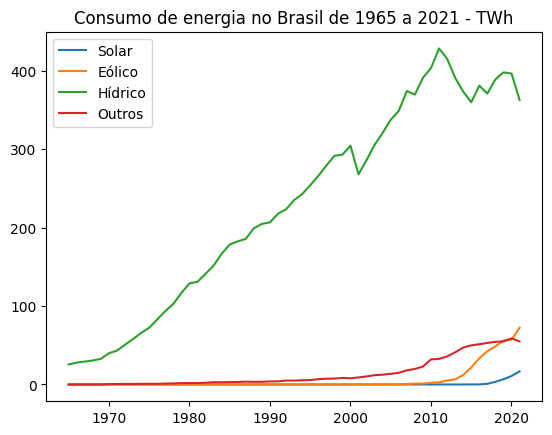

In [ ]:
# gerando gráficos
brazilChart = df[df["Entity"] == "Brazil"]

plt.plot(brazilChart["Year"], brazilChart["Solar Generation - TWh"], label="Solar")
plt.plot(brazilChart["Year"], brazilChart["Wind Generation - TWh"], label="Eólico")
plt.plot(brazilChart["Year"], brazilChart["Hydro Generation - TWh"], label="Hídrico")
plt.plot(brazilChart["Year"], brazilChart["Geo Biomass Other - TWh"], label="Outros")

# adicionando rótulos e título
plt.title('Consumo de energia no Brasil de 1965 a 2021 - TWh')
plt.legend()
plt.show()

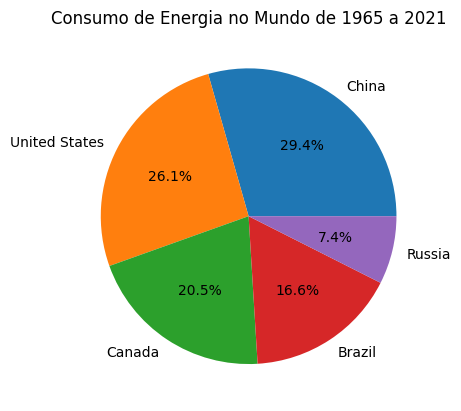

In [ ]:
# gráfico de pizza
plt.pie(totalConsumedByEntity["Total"], labels=totalConsumedByEntity["País"], autopct='%1.1f%%')

# adicionando rótulos e título
plt.title('Consumo de Energia no Mundo de 1965 a 2021')
plt.show()

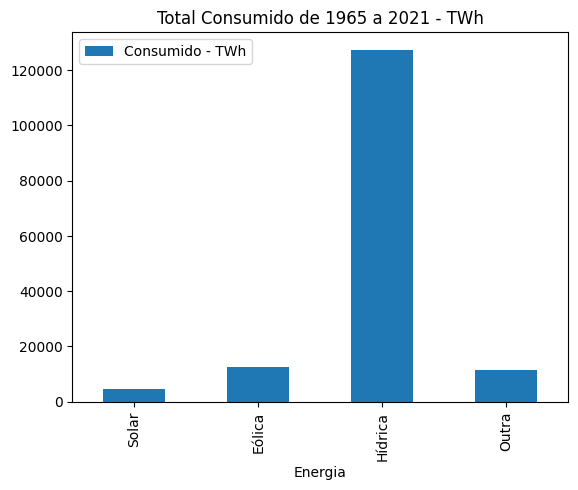

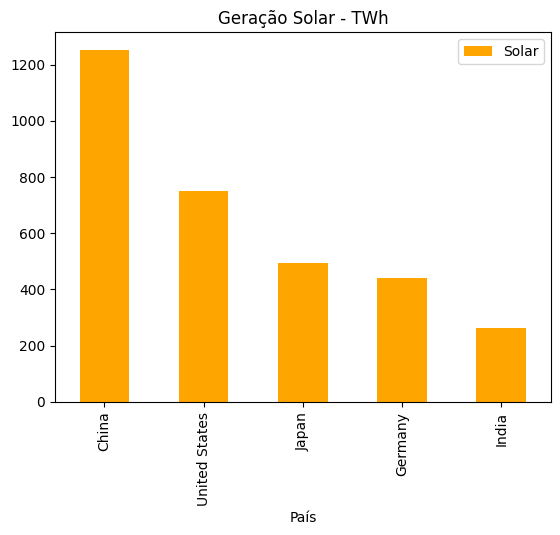

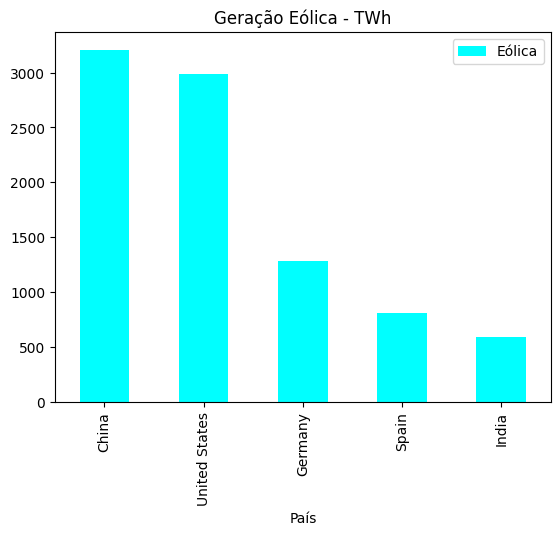

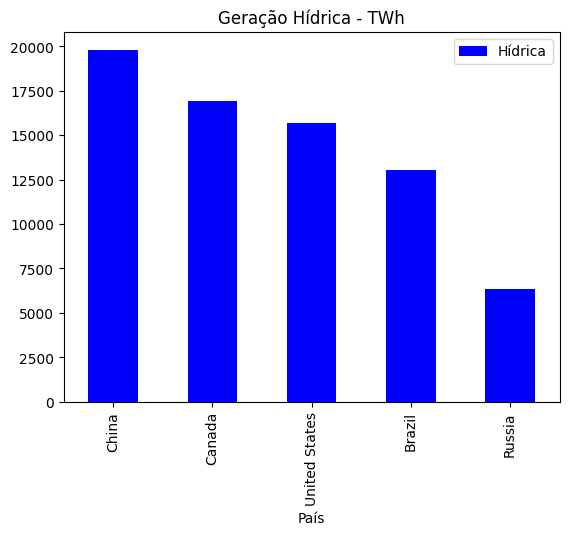

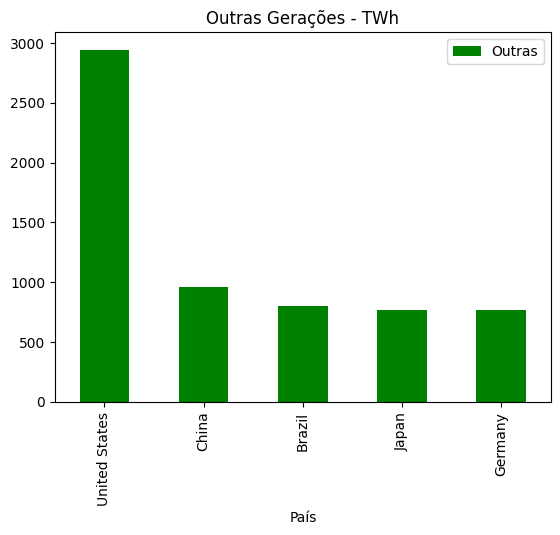

In [ ]:
# outros gráficos
totalConsumedByEnergy.plot(x="Energia", y="Consumido - TWh", kind="bar")
plt.title("Total Consumido de 1965 a 2021 - TWh")
plt.show()

solarConsumedByEntity.plot(x="País", y="Solar", kind="bar", color="orange")
plt.title("Geração Solar - TWh")
plt.show()

windConsumedByEntity.plot(x="País", y="Eólica", kind="bar", color="cyan")
plt.title("Geração Eólica - TWh")
plt.show()

hydroConsumedByEntity.plot(x="País", y="Hídrica", kind="bar", color="blue")
plt.title("Geração Hídrica - TWh")
plt.show()

otherConsumedByEntity.plot(x="País", y="Outras", kind="bar", color="green")
plt.title("Outras Gerações - TWh")
plt.show()